# Thera Bank Personal Loan Campaign Modelling

## Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

## Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

## Attribute Information:
* ID: Customer ID
* Age: Customer's age in completed years
* Experience: \#years of professional experience
* Income: Annual income of the customer (\$000)
* ZIP Code: Home Address ZIP code.
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month (\$000)
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (\$000)
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?

## Learning Outcomes:
* Exploratory Data Analysis
* Preparing the data to train a model
* Training and making predictions using a classification model
* Model evaluation

## Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats

# calculate accuracy measures and confusion matrix, f1 score, ROC AUC
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

## Load Data 

In [2]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

## Overview of Data

In [3]:
data.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
347,348,25,0,43,94305,2,1.6,3,0,0,1,1,1,1
3371,3372,44,18,33,95351,3,0.5,2,0,0,0,0,0,0
3671,3672,50,25,18,93106,1,0.4,3,0,0,0,0,1,0
2243,2244,54,28,79,91342,3,1.7,2,150,0,0,0,1,1
1792,1793,46,20,118,93009,1,5.7,1,0,0,0,1,1,1
272,273,29,3,45,95023,4,0.2,1,158,0,0,0,1,1
436,437,61,35,50,92122,3,1.4,3,112,0,0,0,1,0
1470,1471,58,28,80,91116,2,4.5,3,0,0,0,0,0,1
2052,2053,28,3,120,94080,1,0.8,1,170,0,0,0,0,0
2900,2901,52,28,55,91320,2,3.2,3,151,0,0,0,0,0


In [4]:
data.shape

(5000, 14)

**There are 5000 Observations/Rows and 14 Attributes/Columns**

## Univariat Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
data.isnull().values.any() # Making sure there aren't any null values, although the info above shows there isn't

False

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [9]:
num_people_with_zero_mortgage = len(data.loc[data['Mortgage'] == 0])
print(num_people_with_zero_mortgage)

3462


In [10]:
num_people_with_zero_ccavg = len(data.loc[data['CCAvg'] == 0])
print(num_people_with_zero_ccavg)

106


In [11]:
len(data.loc[data['Experience'] < 0])

52

**There are 52 rows with Experience value of negative, which we'll impute to zero**

In [12]:
data.loc[data['Experience'] < 0].head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0


In [13]:
#Change Experience value to 0 for all negative values of Experience
data.loc[data['Experience'] < 0, 'Experience'] = 0

### Value counts of all categorical columns

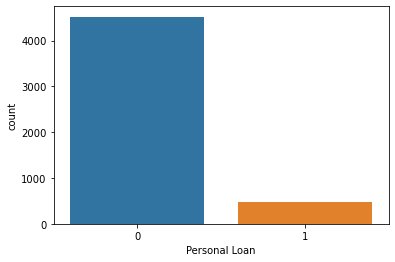

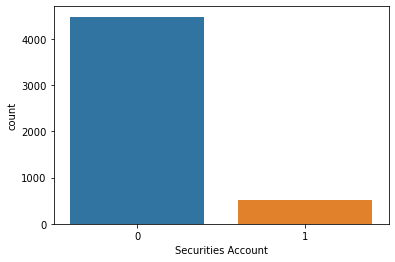

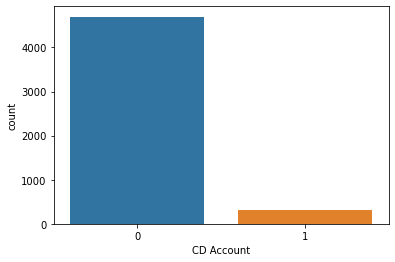

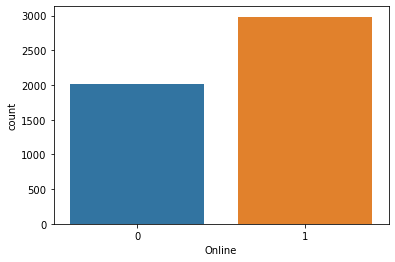

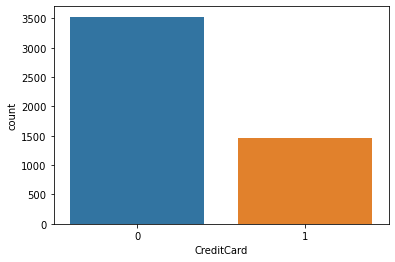

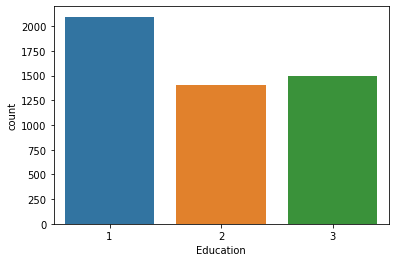

In [14]:
for i in ['Personal Loan','Securities Account', 'CD Account', 'Online', 'CreditCard', 'Education']:
    sns.countplot(data[i])
    plt.show()

In [44]:
data.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

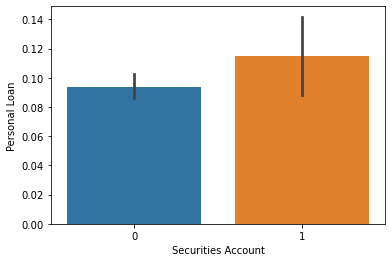

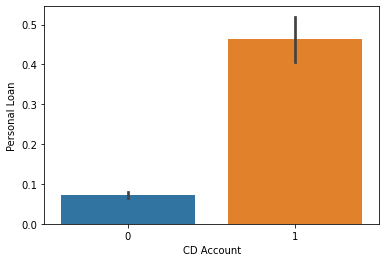

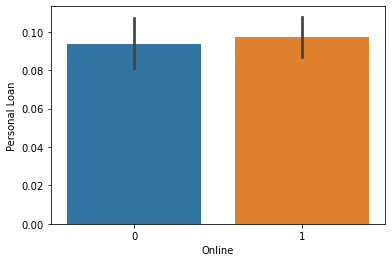

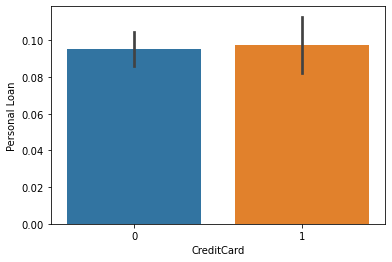

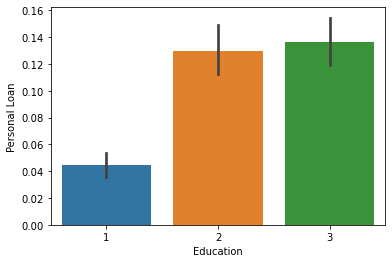

In [15]:
for i in ['Securities Account', 'CD Account', 'Online', 'CreditCard', 'Education']:
    sns.barplot(data[i], data['Personal Loan'])
    plt.show()

In [16]:
for i in ['Securities Account', 'CD Account', 'Online', 'CreditCard', 'Education']:
    print(data[i].value_counts(normalize=True))
    print()

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

1    0.5968
0    0.4032
Name: Online, dtype: float64

0    0.706
1    0.294
Name: CreditCard, dtype: float64

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64



In [17]:
#Calculate baseline proportion - ration of personal loan offer accepted (1) to loan offer declined (0)
prop_Y = data['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


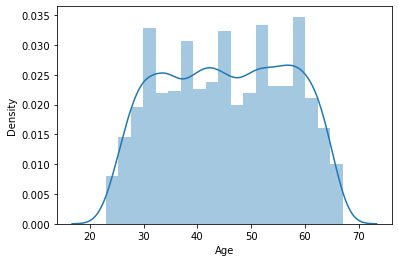

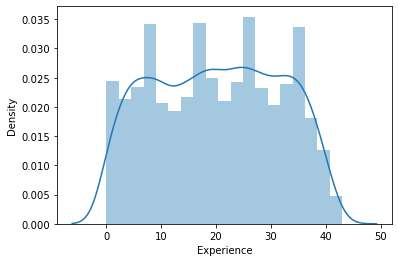

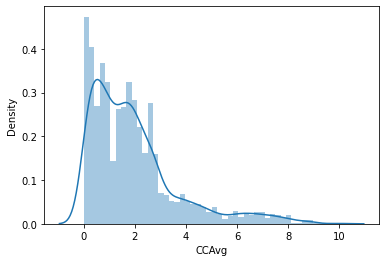

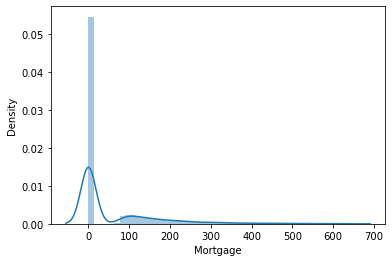

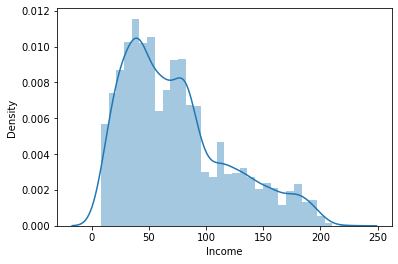

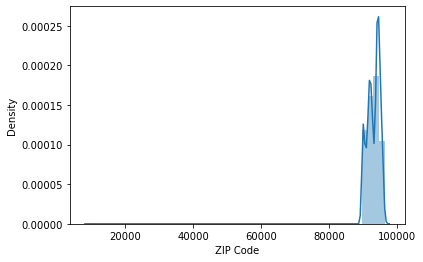

In [18]:
for i in ['Age', 'Experience', 'CCAvg', 'Mortgage', 'Income', 'ZIP Code']:
    sns.distplot(data[i])
    plt.show()

In [19]:
# dropping ID column
data = data.drop('ID',axis=1)

In [20]:
# dropping ID column
data = data.drop('ZIP Code',axis=1)

## Bivariate Analysis

In [21]:
#Convert X & Y variable to a categorical variable wherever relevant
cr_df = data.copy()
for i in ['Personal Loan','Securities Account', 'CD Account', 'Online', 'CreditCard', 'Education', 'Family']:
    cr_df[i] = cr_df[i].astype('category')

In [22]:
cr_df.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [23]:
cr_df.groupby(['Personal Loan']).mean()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.367257,20.148894,66.237389,1.729009,51.789381
1,45.066667,19.843750,144.745833,3.905354,100.845833


In [24]:
cr_df.groupby(['Personal Loan']).median()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.0,20.0,59.0,1.4,0.0
1,45.0,20.0,142.5,3.8,0.0


In [25]:
pd.crosstab(cr_df['Securities Account'],cr_df['Personal Loan'], normalize='index')

Personal Loan,0,1
Securities Account,,
0,0.906208,0.093792
1,0.885057,0.114943


In [26]:
pd.crosstab(cr_df['CD Account'],cr_df['Personal Loan'], normalize='index')

Personal Loan,0,1
CD Account,,
0,0.927629,0.072371
1,0.536424,0.463576


In [27]:
pd.crosstab(cr_df['Online'],cr_df['Personal Loan'], normalize='index')

Personal Loan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


In [28]:
pd.crosstab(cr_df['CreditCard'],cr_df['Personal Loan'], normalize='index')

Personal Loan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902721,0.097279


In [29]:
pd.crosstab(cr_df['Education'],cr_df['Personal Loan'], normalize='index')

Personal Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


In [30]:
pd.crosstab(cr_df['Family'],cr_df['Personal Loan'], normalize='index')

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


# Model Building using Logistic Regression from sklearn
## Split the data into training and test set

In [31]:
# Define X and Y variables
X = cr_df.drop('Personal Loan', axis=1)
Y = cr_df[['Personal Loan']]

In [32]:
# X = pd.get_dummies(X, drop_first=True)
X = pd.get_dummies(X, drop_first=True)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)
x_train.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
717,59,34,94,0.5,0,0,1,0,0,0,0,0,0,1
2496,63,37,32,0.7,141,0,1,0,1,0,0,0,0,0
2469,43,18,89,0.1,307,0,0,0,1,0,0,0,0,1
1375,50,26,179,2.9,0,0,0,0,0,1,0,0,0,1
2742,39,14,89,0.4,0,1,0,0,0,0,0,0,1,0


In [34]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [35]:
print("Original Personal Loan Accepted Values    : {0} ({1:0.2f}%)".format(len(cr_df.loc[cr_df['Personal Loan'] == 1]), (len(cr_df.loc[cr_df['Personal Loan'] == 1])/len(cr_df.index)) * 100))
print("Original Personal Loan Declined Values   : {0} ({1:0.2f}%)".format(len(cr_df.loc[cr_df['Personal Loan'] == 0]), (len(cr_df.loc[cr_df['Personal Loan'] == 0])/len(cr_df.index)) * 100))
print("")
print("Training Personal Loan Accepted Values    : {0} ({1:0.2f}%)".format(len(y_train.loc[y_train['Personal Loan'] == 1]), (len(y_train.loc[y_train['Personal Loan'] == 1])/len(y_train['Personal Loan'])) * 100))
print("Training Personal Loan Declined Values   : {0} ({1:0.2f}%)".format(len(y_train.loc[y_train['Personal Loan'] == 0]), (len(y_train.loc[y_train['Personal Loan'] == 0])/len(y_train['Personal Loan'])) * 100))
print("")
print("Test Personal Loan Accepted Values        : {0} ({1:0.2f}%)".format(len(y_test.loc[y_test['Personal Loan'] == 1]), (len(y_test.loc[y_test['Personal Loan'] == 1])/len(y_test['Personal Loan'])) * 100))
print("Test Personal Loan Declined Values       : {0} ({1:0.2f}%)".format(len(y_test.loc[y_test['Personal Loan'] == 0]), (len(y_test.loc[y_test['Personal Loan'] == 0])/len(y_test['Personal Loan'])) * 100))
# print("")

Original Personal Loan Accepted Values    : 480 (9.60%)
Original Personal Loan Declined Values   : 4520 (90.40%)

Training Personal Loan Accepted Values    : 342 (9.77%)
Training Personal Loan Declined Values   : 3158 (90.23%)

Test Personal Loan Accepted Values        : 138 (9.20%)
Test Personal Loan Declined Values       : 1362 (90.80%)


In [36]:
# Fit the odel on train
logreg = LogisticRegression(random_state=7)
logreg.fit(x_train, y_train)
#predict on test
y_predict = logreg.predict(x_test)

In [37]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.958

Testing accuracy 0.964

Confusion Matrix


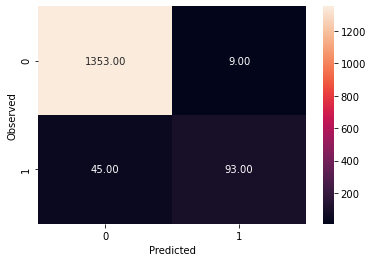

None

Recall: 0.6739130434782609

Precision: 0.9117647058823529

F1 Score: 0.775

Roc Auc Score: 0.833652556981421


In [39]:
print("Trainig accuracy",logreg.score(x_train,y_train))  
print()
print("Testing accuracy",logreg.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

## Check different parameters of Logistic Regression

In [40]:
y_prob = logreg.predict_proba(x_test)[:,1]
y_prob

array([1.18256403e-03, 2.61295451e-01, 3.46655264e-03, ...,
       1.25122844e-02, 5.49985278e-03, 6.47361410e-05])

In [41]:
for threshold in np.arange(0,1,0.1):
    y_predict = np.where(y_prob > threshold, 1, 0)
    print(f"F1 Score for threshold = {round(threshold,2)} is: {f1_score(y_test, y_predict)}")

F1 Score for threshold = 0.0 is: 0.16849816849816848
F1 Score for threshold = 0.1 is: 0.6313131313131313
F1 Score for threshold = 0.2 is: 0.7169811320754716
F1 Score for threshold = 0.3 is: 0.762589928057554
F1 Score for threshold = 0.4 is: 0.792156862745098
F1 Score for threshold = 0.5 is: 0.775
F1 Score for threshold = 0.6 is: 0.7345132743362831
F1 Score for threshold = 0.7 is: 0.7096774193548386
F1 Score for threshold = 0.8 is: 0.6305418719211823
F1 Score for threshold = 0.9 is: 0.5549738219895288


**For the above model, Optimal Threshold for maximum F1 score can be set to 0.4**

In [42]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [43]:
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

NameError: name 'X_train' is not defined

In [ ]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

In [ ]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

In [ ]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

### parameter check conclusion:
Changing the solver, penalty, and C score had no effect on the model accuracy.
Changing from default class_weight=None to 'balanced' had a negative effect on model accuracy.

The only thing that showed some positive effect would be to tweak the threshold to 0.4, which woul dincrease our F1 score.

# Conclusion
Looking at our Confusion Matrix as well as our training and testing accuracy. We see that both training and testing accuracy is high, and give similar numbers. This in turn lets feel confident that the bank can use this model to predict if customers are more or less likely to accept a loan offer.

Also, the F1 Score is could be improved by by changing the threshold, as well as manipulating the model as to get the Recall score and Precision score closer together.